In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
pd.set_option('use_inf_as_na', True)
from collections import Counter

In [ ]:
raw_data = pd.read_pickle(r'C:\Users\eddie\Documents\MSCS\Machine Learning\week1\dataset.pkl')

In [ ]:
data = raw_data[raw_data['market_cap'] > 1000.0]

In [4]:
data.fillna(0.0,inplace=True)

C:\Users\eddie\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
def f(x):
    if x > 0.01:
        return 1
    else:
        return -1

In [6]:
data['rel_performance'] = data['pred_rel_return'].apply(f)

C:\Users\eddie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
data.reset_index(inplace=True,)
data.set_index('date',inplace=True)

In [8]:
data.head()

,ticker,actq,apq,atq,ceqq,cheq,cogsq,csh12q,cshfdq,cshiq,...,sector_code_817.0,sector_code_822.0,sector_code_823.0,sector_code_825.0,sector_code_830.0,sector_code_835.0,sector_code_840.0,sector_code_845.0,sector_code_850.0,rel_performance
date,,,,,,,,,,,,,,,,,,,,,
2000-02-09,CSCO,7722.000,482.000,21391.000,16523.000,3968.000,1422.000,3374.1250,3648.000,3445.000,...,0,0,0,0,0,0,0,0,0,-1
2000-02-09,ROP,172.725,19.662,474.649,239.432,3.198,47.634,30.2688,31.217,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-10,CMOS,240.767,27.044,376.536,209.411,68.625,43.023,21.4360,23.753,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-11,DELL,7681.000,3538.000,11471.000,5308.000,4132.000,5452.000,2536.0000,2731.000,2575.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-15,VAL,507.082,139.497,1094.080,402.382,27.605,221.366,43.1858,43.687,53.321,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_1 = data.loc['2007-01-01':'2010-01-01'] #training period from 2007-01-01 to 2010-01-01 (3 years)

In [10]:
df_valid =  data.loc['2009-07-30':'2009-10-30'] #validation period from 2009-07-30 to 2009-10-30
df_test = data.loc['2009-10-30':'2010-01-31'] #testing period next quarter after validation period

In [11]:
train_1 = df_1.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
# train_2 = df_2.reset_index().drop(['ticker','date',
#                                    'next_period_return',
#                                    'spy_next_period_return',
#                                    'rel_performance','pred_rel_return',
#                                   'return', 'cum_ret', 'spy_cum_ret'],axis=1)

valid = df_valid.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

test = df_test.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [12]:
train_1_stock_returns = df_1['next_period_return']
valid_stock_returns = df_valid['next_period_return']
# train_2_stock_returns = df_2['next_period_return']
test_stock_returns = df_test['next_period_return']

In [13]:
y_1 = df_1['rel_performance']
# y_2 = df_2['rel_performance']
y_valid = df_valid['rel_performance']
y_test = df_test['rel_performance']

In [14]:
y_1 = y_1.values
# y_2 = y_2.values
y_valid = y_valid.values
y_test = y_test.values

In [15]:
t_clf = DecisionTreeClassifier(min_samples_leaf=1400, max_depth = 1000) #setting max_level

In [16]:
bg_clf = BaggingClassifier(t_clf, oob_score=True, random_state=123, n_jobs=-1, n_estimators = 100) #setting n_estimators

In [17]:
bg_clf.fit(train_1,y_1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1000,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1400,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
 

In [18]:
bg_clf.score(train_1,y_1)

0.5580889662027833

In [19]:
bg_clf.score(valid,y_valid)

0.5191370911621433

In [20]:
pred_valid = bg_clf.predict(valid)

In [21]:
Counter(pred_valid)

Counter({-1: 452, 1: 985})

In [22]:
Counter(y_valid)

Counter({-1: 689, 1: 748})

In [23]:
bg_clf.oob_score_ #out of bag score
#checks whether or not we overfit, validation score
#average accuracy of each tree that does not contain datapoint x. loop through each x in dataset

0.5423707753479126

In [24]:
confusion_matrix(y_valid,pred_valid)

array([[225, 464],
       [227, 521]], dtype=int64)

In [25]:
def baggingtree_feat_importance(m, df):
    feature_importances = []
    for est in m.estimators_:
        fi = est.feature_importances_
        feature_importances.append(fi)
    feature_importances = np.array(feature_importances)
    print(feature_importances.shape)
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp':np.mean(feature_importances,axis=0)}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [26]:
fi = baggingtree_feat_importance(bg_clf,train_1)

(100, 725)


In [27]:
features = fi[(fi['feat_imp'] > 0.003)]
features

,cols,feat_imp
105,cf_yield,0.414677
180,fqtr_2,0.106411
160,debt_assetsq,0.055108
95,evmq,0.032904
162,de_ratioq,0.031012
152,ocf_lctq,0.025270
147,debt_ebitdaq,0.024231
135,pretret_earnatq,0.018548
151,profit_lctq,0.017683
145,rect_actq,0.014418


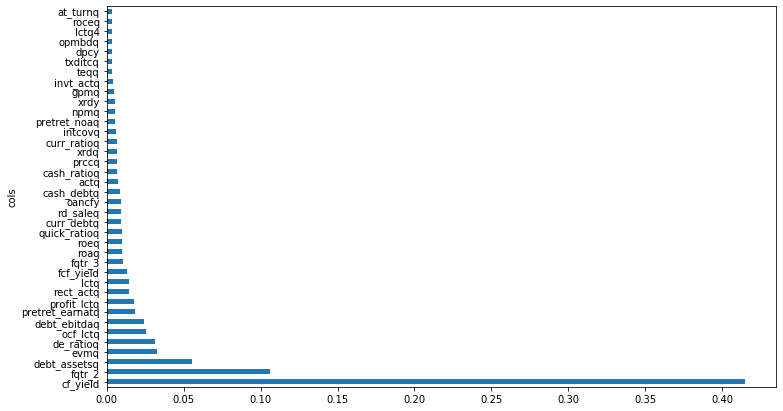

In [28]:
plot_fi(features);

In [29]:
len(features['cols'].values)

38

In [30]:
train_1 = train_1[features['cols'].values]
valid = valid[features['cols'].values]

In [31]:
bg_clf.fit(train_1,y_1)
bg_clf.score(train_1,y_1)

0.5535536779324056

In [32]:
pred_valid = bg_clf.predict(valid)
bg_clf.score(valid,y_valid)

0.5184411969380655

In [33]:
bg_clf.oob_score_

0.5431784294234593

In [34]:
(pred_valid * valid_stock_returns).sum()

48.44105699999997

In [35]:
def profit_importance(t,df,rets):
#     np.random.seed(123)
    profit = []
    for col in df.columns:
        prof = []
        for _ in range(10):
            X = df.copy()
            X[col] = np.random.permutation(df[col].values)
            prediction = t.predict(X)
            prof.append((prediction * rets).sum())
        profit.append(np.mean(prof))
    return profit

In [36]:
def baggingtree_profit_importance(m, df,rets):
    return pd.DataFrame({'cols':df.columns, 'pi_imp':profit_importance(m,df,rets)}
                       ).sort_values('pi_imp', ascending=True)

In [37]:
pi = baggingtree_profit_importance(bg_clf,valid,df_valid['next_period_return'])
pi

,cols,pi_imp
0,cf_yield,29.977680
1,fqtr_2,43.531481
3,evmq,44.684914
8,profit_lctq,46.458749
21,cash_ratioq,47.529531
28,xrdy,47.800399
17,rd_saleq,47.804283
16,curr_debtq,47.810013
15,quick_ratioq,47.915897
6,debt_ebitdaq,47.964025


In [38]:
profits = []
feat=[]

train = train_1.copy()
validation = valid.copy()

while len(train.columns)>1:

    col_to_drop = pi.iloc[-1]['cols']
    train.drop(col_to_drop,axis=1,inplace=True)
    validation.drop(col_to_drop,axis=1,inplace=True)
        
    bg_clf.fit(train,y_1)
    pi = baggingtree_profit_importance(bg_clf,validation,df_valid['next_period_return'])

    pred_valid = bg_clf.predict(validation)
        
    print((pred_valid * df_valid['next_period_return']).sum())
    profits.append((pred_valid * df_valid['next_period_return']).sum())
    feat.append(train.columns)

49.32543099999997
50.22625699999997
50.08402699999997
50.135712999999974
50.88118299999997
51.14863899999997
51.070088999999975
52.94613099999998
51.759516999999974
52.742720999999975
52.36162299999998
52.84929699999998
52.68739899999997
52.49651499999999
52.80102299999999
52.51353899999999
52.99069299999998
53.40323499999997
54.345492999999976
54.39735099999997
54.541132999999974
52.97433099999998
52.48215899999998
52.540152999999975
52.63458299999998
53.08609299999998
52.89577899999999
53.29259899999998
52.20131299999998
51.73827499999997
50.51463699999999
50.38551699999999
50.45570899999997
47.73233099999999
50.169424999999954
54.016628999999966
55.08182099999999


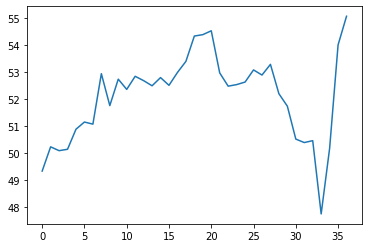

In [39]:
plt.plot(profits);

In [45]:
n = np.argmax(profits)
optim_feats = feat[n]
max_profits = profits[n]

In [46]:
print(max_profits)
print(optim_feats)

55.08182099999999
Index(['cf_yield'], dtype='object')


In [47]:
train_1_optim = train_1[optim_feats]
valid_optim = valid[optim_feats]


bg_clf.fit(train_1_optim,y_1)
print(bg_clf.score(train_1_optim,y_1))
pred_valid_tree = bg_clf.predict(valid_optim)
print(bg_clf.score(valid_optim,y_valid))
(pred_valid_tree * valid_stock_returns).sum()

0.5374005964214712
0.5135699373695198


55.08182099999999

In [48]:
from scipy.cluster import hierarchy as hc
import scipy.stats

In [49]:
corr = np.round(scipy.stats.spearmanr(train_1_optim).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train_1_optim.columns, orientation='left', leaf_font_size=16)
plt.show()

#shows features that are correlated, elimates the ones that have high correlation

TypeError: 'numpy.float64' object does not support item assignment

In [50]:
start_dates = [pd.to_datetime('2000-01-01') + pd.DateOffset(months = 3 * i) for i in range(63)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [51]:
training_frames = [data.loc[d:d+pd.DateOffset(months = 36)] for d in start_dates]
test_frames = [data.loc[d + pd.DateOffset(months=3):d+pd.DateOffset(months = 6)] for d in end_dates]

In [52]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [53]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [54]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [55]:
opt_training_data = [t[optim_feats] for t in training_data]
opt_test_data = [v[optim_feats] for v in test_data]

In [56]:
P_L = []
x = [1]
ret = []

for i in range(len(training_labels)):
        bg_clf.fit(opt_training_data[i],training_labels[i])
        pred_i = bg_clf.predict(opt_test_data[i])
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L.append(profit_i)
        num_positions = len(pred_i)
        ret.append((1.0/num_positions) * profit_i)
        x.append(x[i] + (x[i]/num_positions) * profit_i)


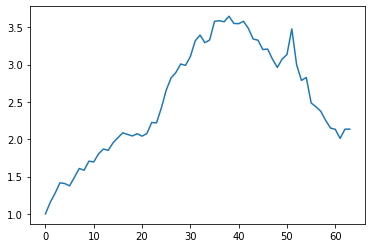

In [57]:
plt.plot(x);

In [58]:
SPY = pd.read_pickle(r'C:\Users\eddie\Documents\MSCS\Machine Learning\week2\SPY_cum_ret.pkl')
SPY = SPY.loc['2003-01-01':]
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

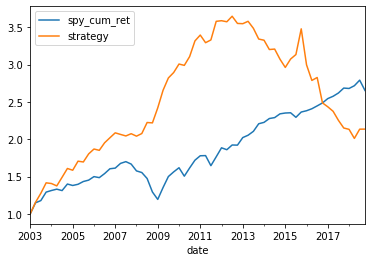

In [59]:
SPY.plot();

In [ ]:
SPY = SPY.resample('Y').ffill()

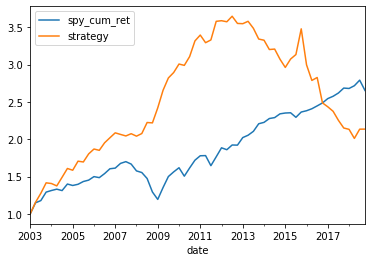

In [60]:
SPY.plot();

In [61]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
strategy_sr = strategy_mean_ret/strategy_std
print('Strategy Sharpe Ratio: ',strategy_sr)

Strategy Sharpe Ratio:  0.13509190228892176


In [62]:
(SPY['spy_cum_ret'] - 1).diff().mean()
(SPY['spy_cum_ret'] - 1).diff().std()
print('SP Sharpe Ratio: ',(SPY['spy_cum_ret'] - 1).diff().mean()/(SPY['spy_cum_ret'] - 1).diff().std())

SP Sharpe Ratio:  0.37670127496949596


In [63]:
x[-1]

2.135075057930679

In [64]:
SPY['spy_cum_ret'][-1]

2.652199999999999

In [65]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]
beta

0.3392285179343331

In [66]:
residual_ret = strategy_ret - beta * spy_ret
IR = np.mean(residual_ret)/np.std(residual_ret)
IR #information ratio, sharpe ratio for alphas; any IR above 1 is good

0.07000692658418836

In [67]:
alpha = np.mean(residual_ret)
alpha

0.009120661914278957